<a href="https://colab.research.google.com/github/dxdiego5/MachineLearning/blob/main/ATIV_MACHINE_LEARNING_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### TRABALHO FINAL DE MACHINE LEARING III

##### @AUTOR - DIEGO FELIPE DA SILVA BEZ


O trabalho foi inicado da seguinte forma, junto com mais dois colegas do curso, Jose e Fernando demos inicio ao trabalho juntos onde cada um apresento uma idea, de como processar e analisar os dados, em seguida cada um prosseguiu com seu desenvolvimento, com as ideias e metricas prontas eu apresento o meu algoritmo de machine learning abaixo.

-- alguns estudos externos mais material do metnor postado em plataforma, para efetuar a conclusao do mesmo.



---



###### IMPORTS

In [322]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

`O dataset ja se encontra analisado direto da base, não necessitando a verificação de erros e dados redundantes e Nan...`

###### FUNÇÕES

In [324]:
def display_info(df):
    display('-----> HEAD DO DATAFRAME 3 LINES <-----')
    display(df.head(3))
    display('=============================================================')
    display('-----> SHAEPE DO DATA FRAME <-----')
    display(df.shape)
    display('=============================================================')
    display('-----> DESCRIÇÃO DO DATAFRAME <-----')
    display(df.describe())
    display('=============================================================')

# Função para normalizar os dados utilizando uma função do sklearn do modulo preprocessing
def normalize_columns(df):
    df = df.sort_values('Type')
    X = df.drop('Type', axis=1)

    y = df.drop(df.columns[:-1] , axis=1)
    transformer = MaxAbsScaler().fit(X)
    X = transformer.transform(X)
    
    X = pd.DataFrame(X, columns= df.columns[:-1])

    return X, y

###### IMPORT DO DATASSETS

In [325]:
df = pd.read_csv('Stars.csv')

###### ENCONDER LABELS - TRANSFORMAÇÃO DE DADOS CATEGORICOS EM NUMBERS PARA A ANALISE DO ALGORITIMO

In [326]:
label_encoder = preprocessing.LabelEncoder()
df['Spectral_Class'] = label_encoder.fit_transform(df['Spectral_Class'])
df['Color'] = label_encoder.fit_transform(df['Color'])

###### INFORMAÇÕES DO DATAFRAME SEM A `NORMALIZAÇÃO` DOS DADOS

In [327]:
display_info(df)

'-----> HEAD DO DATAFRAME 3 LINES <-----'

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.0024,0.1700,16.12,8,5,0
1,3042,0.0005,0.1542,16.60,8,5,0
2,2600,0.0003,0.1020,18.70,8,5,0


'============================================================='

'-----> SHAEPE DO DATA FRAME <-----'

(240, 7)

'============================================================='

'-----> DESCRIÇÃO DO DATAFRAME <-----'

,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,5.766667,3.758333,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,4.208446,2.090007,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000,0.000000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000,1.000000,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,8.000000,5.000000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,8.000000,5.000000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,16.000000,6.000000,5.000000


'============================================================='

###### CHAMADA DA FUNÇÂO PARA NORMALIZAÇÂO DO DADOS CO MRETURN DE (X e y) JÁ CORRIGIDOS E PRONTOS PARA TREINAMENTO

In [328]:
X, y = normalize_columns(df)

###### ANALISE E STATISTICAS DOS DADOS EM GRAFICOS, DESENVOLVIDO EM EQUIPE

In [329]:
columns_ = df.columns[:-1]
for column in columns_[:-1]:

    fig = go.Figure()

    for class_ in range(df['Type'].max()+1):

        fig.add_trace(go.Violin(x = df['Type'][df['Type'] == class_], 
                                y = df[column][df['Type'] == class_], 
                                name = class_, 
                                box_visible = True, 
                                points= 'all',
                                ))

    fig.update_layout(title = f'Gráfico comparativo de {column} entre tipos de estrelas',
                      yaxis_title = column,
                      xaxis_title = 'Classes',
                      height= 600,
                      width= 1000)

    fig.update_traces(marker_line_width = 0.5, 
                      marker_line_color= "black")

    fig.for_each_trace(
                        lambda t: t.update(
                        name= {"0":"Anão Vermelho", "1":"Anã Marrom ", "2":"Anã Branca", "3":"Sequência Principal", "4":"Supergigantes", "5":"Hipergigantes"}[t.name],
                        legendgroup= {"0":"Anão Vermelho", "1":"Anã Marrom ", "2":"Anã Branca", "3":"Sequência Principal", "4":"Supergigantes", "5":"Hipergigantes"}[t.name])
                        )
    fig.show()

###### CONVERSÃO DE DADOS PARA NUMPY ARRAY

In [330]:
def convert_to_np_array(X,y):
  y = np.array(y)
  y = to_categorical(y, 6)
  X = np.array(X)
  return X, y

###### SEPARANDO DADOS EM TREINAMENTO E TESTES

In [331]:
X_, y_ = convert_to_np_array(X, y)

x_train, x_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=20)

###### INICIANDO MODELO DE REDE NEURAL PARA TREINAMENTO

In [332]:
model = Sequential()

###### CRIANDO E ADICIONANDO NEURONIOS A REDE PARA TREINAMENTO

In [333]:
model.add(Dense(24, input_dim=6, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='softmax'))

###### ADICIONANDO UM RATE DE APRENDIZADO PARA MODELO DE ALGORITMO `ADAM`

In [334]:
adam_opt = Adam(learning_rate=0.01)

###### TREINANDO A REDE

In [341]:
model.compile(optimizer= adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50, batch_size=5)

Epoch 1/50
39/39 [==============================] - 1s 2ms/step - loss: 0.0154 - accuracy: 1.0000
Epoch 2/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 1.0000
Epoch 3/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 4/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 5/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 6/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000
Epoch 7/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 8/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0537 - accuracy: 0.9792
Epoch 9/50
39/39 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9688
Epoch 10/50
39/39 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9740
Epoch 11/50
39/39 [

###### APLICANDO O TESTE COM OS DADOS JA TREINADOS UTILIZANDO OS 20% DE TESTE

In [342]:
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 7ms/step


###### TESTE DE ACURRACIA DO ALGORITIMO

In [343]:
y_predict = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

accurancy = accuracy_score(y_test_, y_predict)

display(f'accurancy = {accurancy:0.2%}')

'accurancy = 100.00%'

In [344]:
y_pred_ = pd.DataFrame(y_predict)
y_pred_ = y_pred_.astype(int)
print(classification_report(y_pred_, y_test_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         7

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [345]:
matriz = confusion_matrix(y_pred_, y_test_)

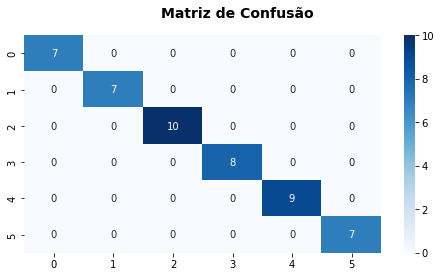

In [346]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Matriz de Confusão ', fontsize=14, fontweight='bold')
labels = [0,1,2,3,4,5]
sns.heatmap(matriz,annot=True, fmt="d",cmap='Blues',xticklabels=labels, yticklabels= labels)